# 4. Web Scraping - Scrapy

<img src='https://xn--kvin-duranty-beb.fr/wp-content/uploads/2022/10/Web-Scraping-_-IPSSI-PRS-3.png'>

Dans cet exercice, nous utiliserons la bibliothèque scrapy afin de collecter les données des sites internet suivants :

- Partie 1 : [AlloCiné](https://www.allocine.fr/film/meilleurs)
Nous collecterons les informations des meilleurs films recensés par la platforme.


- Partie 2 : [Boursorama](https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC)
Nous collecterons les données boursières des entreprises du CAC40.


# Parie 1 - Les meilleurs films selon [Allociné.fr](https://www.allocine.fr/film/meilleurs/)

<img src= 'https://fr.web.img2.acsta.net/newsv7/15/10/19/21/14/237930.jpg'>

L'objectif de cet exercice est de collecter les données des meilleurs films présents sur la page `https://www.allocine.fr/film/meilleurs/` du site allocine.fr.

Les données que nous collecterons seront les suivantes :
- Les titres du film
- Les liens des images
- Les noms des auteurs
- Les durées des films
- Les genres cinématographiques 
- Les scores des films
- Les descriptions des films
- Les dates de sortie des films

## 4.1 Installez scrapy à l'aide de la commande suivante :


`pip install scrapy`


## 4.2 Générez un environement de travail scrapy en executant la commande suivante :

In [ ]:
# Création du dossier WebCrawler contenant l'ensemble des fichiers utiles au fonctionnement de scrapy
!scrapy startproject WebCrawler

In [ ]:
# Création du projet AlloCiné dans le dossier WebCrawler/spider
!cd WebCrawler && scrapy genspider allocine https://www.allocine.fr/film/meilleurs

Les fichiers de scrapy que nous manipulerons seront :

1. le fichier `items.py` qui contient les champs que nous souhaitons collecter (ex : nom des films, score, date de publication). Chaque champs sera introduit dans la class `ReviewsAllocineItem` avec la nomenclature suivante : `name = scrapy.Field()`.


2. le fichier `allocine.py` qui contient les fonctions qui permetons la collecte.

## 4.3 Ajoutez dans le fichier `items.py` les champs que nous souhaitons collecter.

Ajoutez dans la class `ReviewsAllocineItem(scrapy.Item)` les champs suivants,
pour rappel la nomenclature des champs est la suivante : 

`name = scrapy.Field()`.

- title
- img
- author
- time
- genre
- score
- desc
- release

In [ ]:
import scrapy

# À ajouter au fichier items.py
class ReviewAllocineItem(scrapy.Item):
  title = scrapy.Field()
  img = scrapy.Field()
  author = scrapy.Field()
  time = scrapy.Field()
  genre = scrapy.Field()
  score = scrapy.Field()
  desc = scrapy.Field()
  release = scrapy.Field()

## 4.3 Lancez votre terminal puis exécutez la commande suivante :

C'est dans le terminale que nous intéragirons avec scrapy pour manipuler les bases du site allocine.fr

`scrapy shell`

`url = 'https://www.allocine.fr/film/meilleurs'`

`fetch(url)`

## 4.4 Exécutez dans votre terminal les commandes suivantes et notez vos observations.

Repérez en parallèle à quelles balises correspondent vos résultats.

`response`

`response.css('a')`

`len(response.css('a'))`

`response.css('a::text')`

`response.css('a')[0].attrib`

`response.css('a')[0].attrib['href']`

`response.css('a::text')[0].extract()`

`response.css('h1.item')`

`response.css('h1.item::text')`

`response.css('h1.item::text')[0].extract()`

`response.css('img')`

## 4.5 Recherchez les informations suivantes sous forme de chaine de caractère (str) :

0. La balise qui liste l'ensemble des films
1. Le titre du premier film
2. Le lien de l'image du premier film
3. Le nom de l'auteur du premier film
4. La durée du premier film 
5. Le genre cinématographique du premier film
6. Le score du premier film
7. La description du premier film
8. La date de sortie du premier film

In [ ]:
# 0. La balise qui liste l'ensemble des films
"response.css('ol li.mdl')"

#1. Le titre du premier film
"response.css('ol li.mdl h2 a::text')[0].extract()"

#2. Le lien de l'image du premier film
"response.css('ol li.mdl img')[0].attrib['src']"

#3. Le nom de l'auteur du premier film
"response.css('ol li.mdl a.blue-link::text')[0].extract()"

#4. La durée du premier film 
"response.css('ol li.mdl div.meta-body-item.meta-body-info::text')[0].extract().replace('\n', '')"

#5. Le genre cinématographique du premier film
"[element.extract() for element in list_film[5].css('ol li.mdl div.meta-body-item.meta-body-info span::text')][1:]"

#6. Le score du premier film
"response.css('response.css('ol div.rating-item-content span.stareval-note::text')[0].extract()"

#7. La description du premier film
"response.css('ol li.mdl div.synopsis div.content-txt::text')[0].extract().replace('\n', '')"

#8. La date de sortie du premier film
"response.css('ol li.mdl div.meta-body-item span.date::text')[0].extract()"


## 4.6 Complétez le code suivant en fonction des résultats obtenus à la question précédente

In [ ]:
import scrapy
from scrapy import Request
from WebCrawler.items import ReviewAllocineItem


class AllocineSpider(scrapy.Spider):
  name = 'allocine'
  allowed_domains = ['www.allocine.fr']
  
  # Liste des pages à collecter
  start_urls = [f'https://www.allocine.fr/film/meilleurs/?page={n}' for n in range(1,10)]


  def parse_allocine(self, response):
    liste_film = response.css('ol li.mdl')

    # Boucle qui parcours l'ensemble des éléments de la liste des films
    for film in liste_film:
      item = ReviewAllocineItem()

      # Nom du film
      try:
        item['title'] = film.css('h2 a::text')[0].extract()
      except:
        item['title'] = 'None'
            
      # Lien de l'image du film
      try:
        item['img'] = film.css('img')[0].attrib['src']
      except:
        item['img'] = 'None'

      # Auteur du film
      try:
        item['author'] = film.css('a.blue-link::text')[0].extract()
      except:
        item['author'] = 'None'
          
      # Durée du film
      try:
        item['time'] = film.css('div.meta-body-item.meta-body-info::text')[0].extract().replace('\n', '')
      except:
        item['time'] = 'None'

      # Genre cinématographique
      try:
        item['genre'] = [element.extract() for element in film.css('div.meta-body-item.meta-body-info span::text')][1:]
      except:
        item['genre'] = 'None'

      # Score du film
      try:
        item['score'] = film.css('div.rating-item-content span.stareval-note::text')[0].extract()
      except:
        item['score'] = 'None'

      # Description du film
      try:
        item['desc'] = film.css('div.synopsis div.content-txt::text')[0].extract().replace('\n', '')
      except:
        item['desc'] = 'None'

      # Date de sortie
      try:
        item['release'] = film.css('div.meta-body-item span.date::text')[0].extract()
      except:
        item['release'] = 'None'

      yield item

  def start_requests(self):
    for url in self.start_urls:
      yield Request(url = url, callback = self.parse_allocine)


## 4.7 Ajoutez l'ensemble de votre code au fichier `allocine.py` se trouvant dans le dossier `spider`, exécutant la commande suivante afin d'obtenir le fichier `allocine.csv` contenant les données collectées.

In [ ]:
!cd WebCrawler/WebCrawler/spiders && scrapy crawl allocine -o allocine.csv

## 4.7 Importez la bibliothèque Pandas puis visualisez votre collecte de données

In [3]:
import pandas as pd

df = pd.read_csv('./Scrapy/WebCrawler/WebCrawler/spiders/allocine.csv')

df

,author,desc,genre,img,release,score,time,title
0,Wilson Yip,"Film biographique sur la vie de Ip Man, pionni...","Biopic,Arts Martiaux",https://fr.web.img2.acsta.net/c_310_420/medias...,None,"4,4",1h 45min,Ip Man
1,Mamoru Hosoda,"Hana et ses deux enfants, Ame et Yuki, vivent ...","Animation,Fantastique",https://fr.web.img3.acsta.net/c_310_420/medias...,None,"4,1",1h 57min,"Les Enfants Loups, Ame & Yuki"
2,Jonathan Demme,"Clarice Starling, jeune stagiaire du FBI, est ...","Drame,Thriller",https://fr.web.img5.acsta.net/c_310_420/pictur...,7 octobre 2020,"4,8",1h 58min,Le Silence des agneaux
3,Steven Spielberg,Alors que les forces alliées débarquent à Omah...,"Drame,Guerre",https://fr.web.img6.acsta.net/c_310_420/medias...,None,"3,0",2h 43min,Il faut sauver le soldat Ryan
4,Joseph Kosinski,Après avoir été l’un des meilleurs pilotes de ...,Action,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",None,"3,7",2h 11min,Top Gun: Maverick
...,...,...,...,...,...,...,...,...
85,Roger Allers,Le long combat de Simba le lionceau pour accéd...,"Aventure,Animation,Musical","data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",11 avril 2012,"3,4",1h 29min,Le Roi Lion
86,Milos Forman,Rebellion dans un hôpital psychiatrique à l'in...,Drame,"data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",16 septembre 2009,"5,0",2h 09min,Vol au-dessus d'un nid de coucou
87,Stanley Kubrick,"Écrivain, Jack Torrance est engagé comme gardi...","Epouvante-horreur,Thriller","data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",22 mai 2019,"4,0",2h 23min,Shining
88,Alfred Hitchcock,Le publiciste Roger Tornhill se retrouve par e...,"Aventure,Policier","data:image/gif;base64,R0lGODlhAwAEAIAAAAAAAAAA...",None,"4,6",2h 16min,La Mort aux trousses


# Partie 2 - Cotations boursières du CAC40 - [Boursorama](https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC)


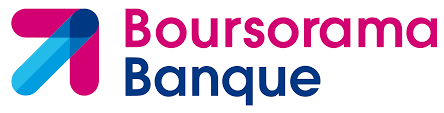



L'objectif de cet exercice sera de collecter les données en temps réelle des actions du CAC40.
Les données que nous collecterons serons :

- le nom de l'indice boursier
- le cours de l'action
- la variation de l'action
- la valeur la plus haute de la séance
- la valeur la plus basse
- la valeur d'ouverture
- la date et l'heure de la collecte


## Lancez le projet scrapy

Créez le projet scrapy nomé `boursorama` en utilisant le lien suivant `https://www.boursorama.com/bourse/actions/palmares/france/france_filter%5Bmarket%5D=1rPCAC`.

Pour rappel la commande scrapy pour génére un nouveau spider est la suivante : 

`scrapy genspider nom_du_projet adresse_url`

In [ ]:
!cd WebCrawler && scrapy genspider boursorama https://www.boursorama.com/bourse/actions/palmares/france/page-1

## Modifiez le fichier items.py en ajoutant les champs à collecter

Ajoutez une class `ReviewsBoursoramaItem(scrapy.Item)` puis les champs avec la nomenclature `name = scrapy.Field()`

## Lancez le shell scrapy

`scrapy shell`

`url = 'https://www.boursorama.com/bourse/actions/palmares/france/page-1?france_filter%5Bmarket%5D=1rPCAC'`

`fetch(url)`

## Compléter le code suivant puis ajoutez-le au fichier `boursorama.py`.

In [ ]:
import scrapy
import datetime
from scrapy import Request
from WebCrawler.items import ReviewBoursoramaItem

class BoursoramaSpider(scrapy.Spider):
  name = 'boursorama'
  allowed_domains = ['www.boursorama.com']
  
  # Liste des pages à collecter
  start_urls = [f'https://www.boursorama.com/bourse/actions/palmares/france/page-{n}' for n in range(1,3)]


  def parse_boursorama(self, response):
    liste_indices = response.css('table.c-table tr.c-table__row')[1:]

    # Boucle qui parcours l'ensemble des éléments de la liste des actions du CAC40
    for indice in liste_indices:
      item = ReviewBoursoramaItem()

      # Indice boursier
      try:
        item['indice'] = indice.css('td a.c-link::text')[0].extract()
      except:
        item['indice'] = 'None'
            
      # Indice cours de l'action
      try:
        item['cours'] = indice.css('td span.c-instrument--last::text')[0].extract().replace(' ', '')
      except:
        item['cours'] = 'None'

      # Variation de l'action
      try:
        item['var'] = indice.css('td span.c-instrument--instant-variation::text')[0].extract()
      except:
        item['var'] = 'None'
          
      # Valeur la plus haute
      try:
        item['hight'] = indice.css('td span.c-instrument--high::text')[0].extract()
      except:
        item['hight'] = 'None'

      # Valeur la plus basse
      try:
        item['low'] = indice.css('td span.c-instrument--low::text')[0].extract()
      except:
        item['low'] = 'None'

      # Valeur d'ouverture
      try:
        item['open_'] = indice.css('td span.c-instrument--open::text')[0].extract().replace(' ', '')
      except:
        item['open_'] = 'None'

      # Date de la collecte
      try:
        item['time'] = str(datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
      except:
        item['time'] = 'None'

      yield item

  def start_requests(self):
    for url in self.start_urls:
      yield Request(url = url, callback = self.parse_boursorama)


## Executez la commande suivante afin de collecter vos données

In [ ]:
!cd WebCrawler/WebCrawler/spiders && python -m scrapy crawl boursorama -o boursorama.csv

## Importez la bibliothèque Pandas puis visualisez votre collecte de données

In [6]:
import pandas as pd

df = pd.read_csv('./Scrapy/WebCrawler/WebCrawler/spiders/boursorama.csv')

df

,cours,hight,indice,low,open_,time,var
0,14.720,18.880,ORPEA,13.240,13.240,2022-10-19 16:28:51,+14.11%
1,1.530,1.530,AIR FRANCE-KLM,1.480,1.498,2022-10-19 16:28:51,+5.26%
2,0.780,0.782,CGG,0.757,0.766,2022-10-19 16:28:51,+3.28%
3,11.040,12.120,KORIAN,10.730,10.810,2022-10-19 16:28:51,+2.89%
4,21.570,21.710,VEOLIA,21.120,21.470,2022-10-19 16:28:51,+2.81%
5,141.400,142.600,DASSAULT AVIATION,138.700,138.700,2022-10-19 16:28:51,+2.69%
6,8.325,8.400,CASINO GUICHARD PERRACHON,8.110,8.390,2022-10-19 16:28:51,+2.46%
7,25.460,25.480,VERALLIA,24.880,25.000,2022-10-19 16:28:51,+2.41%
8,19.290,19.290,KLEPIERRE,18.615,18.880,2022-10-19 16:28:51,+2.33%
9,24.515,24.520,AXA,24.000,24.160,2022-10-19 16:28:51,+2.30%


# Bonus - [MyAnimeListe](https://myanimelist.net/manga.php?letter=A)

<img src='https://image.myanimelist.net/ui/OK6W_koKDTOqqqLDbIoPArR89MP-ulHxaLCJ2P-BfXg'>

Reproduisez l'ensemble de la procédure en collectant les données du site [MyAnimeListe](https://myanimelist.net/manga.php?letter=A).

Les données à collecter : 
- le nom des animés
- l'image des animés
- la description des animés.

Utilisez la class `DataBase` pour stoquer vos donneés dans une base de données.

In [ ]:
#Générer un projet scrapy
!cd WebCrawler && scrapy genspider manga https://myanimelist.net/manga.php?letter=A
    
# Collecter les données
!cd WebCrawler/WebCrawler/spiders && scrapy crawl manga -o manga.csv

## Importez la bibliothèque Pandas puis visualisez votre collecte de données

In [13]:
import pandas as pd

df = pd.read_csv('./Scrapy/WebCrawler/WebCrawler/spiders/manga.csv')

df

,desc,img,title
0,I've posessed the body of the sociopath villai...,https://cdn.myanimelist.net/r/50x70/images/man...,A Beast Tamed by the Villainess
1,"Kyouko, a university student, is in love with ...",https://cdn.myanimelist.net/r/50x70/images/man...,A Bewildering Flower
2,The antics of two high school girls: Kim Peong...,https://cdn.myanimelist.net/r/50x70/images/man...,A Bias Girl
3,"Middle school, year 2, summer. The me who was ...",https://cdn.myanimelist.net/r/50x70/images/man...,A Bitch and a Punk
4,A collection of sweet stories about couples an...,https://cdn.myanimelist.net/r/50x70/images/man...,A Bittersweet Life
5,When she interviewed for a job at an antique b...,https://cdn.myanimelist.net/r/50x70/images/man...,A Bookstore Romance
6,This one shot has won 3rd spot of Daewon manwh...,https://cdn.myanimelist.net/r/50x70/images/man...,A Boy Who Fishes Dreams
7,1. A Boy. A Girl. 2. Ariya Nashiya 3. Kinmokus...,https://cdn.myanimelist.net/r/50x70/images/man...,A Boy. A Girl.
8,In an attempt to ward off yet another one of J...,https://cdn.myanimelist.net/r/50x70/images/man...,A Business Proposal
9,"Jin Young is a good student with good grades, ...",https://cdn.myanimelist.net/r/50x70/images/man...,A Cat and a Bird


In [ ]:
import sqlalchemy as db

class DataBase():
  def __init__(self, name_database='database'):
    self.name = name_database
    self.url = f"sqlite:///{name_database}.db"
    self.engine = db.create_engine(self.url)
    self.connection = self.engine.connect()
    self.metadata = db.MetaData()
    self.table = self.engine.table_names()
      
  
  def create_table(self, name_table, **kwargs):
    colums = [db.Column(k, v, primary_key = True) if 'id_' in k else db.Column(k, v) for k,v in kwargs.items()]
    db.Table(name_table, self.metadata, *colums)
    self.metadata.create_all(self.engine)
    print(f"Table : '{name_table}' are created succesfully")
      
  def read_table(self, name_table, return_keys=False):
    table = db.Table(name_table, self.metadata, autoload=True, autoload_with=self.engine)
    if return_keys:table.columns.keys() 
    else : return table
      
      
  def add_row(self, name_table, **kwarrgs):
    name_table = self.read_table(name_table)
    
    stmt = (
        db.insert(name_table).
        values(kwarrgs)
    )
    self.connection.execute(stmt)
    print(f'Row id added')
      
      
  def delete_row_by_id(self, table, id_):
    name_table = self.read_table(name_table) 
    
    stmt = (
        db.delete(name_table).
        where(students.c.id_ == id_)
        )
    self.connection.execute(stmt)
    print(f'Row id {id_} deleted')
      
  def select_table(self, name_table):
    name_table = self.read_table(name_table)       
    stm = db.select([name_table])
    return self.connection.execute(stm).fetchall()